In [13]:
# Define paths to the datasets
train_dir = "/content/ANN_WS24_Assignment/TRAIN"
test2_dir = "/content/ANN_WS24_Assignment/TEST2"
test_dir = "/content/ANN_WS24_Assignment/TEST"

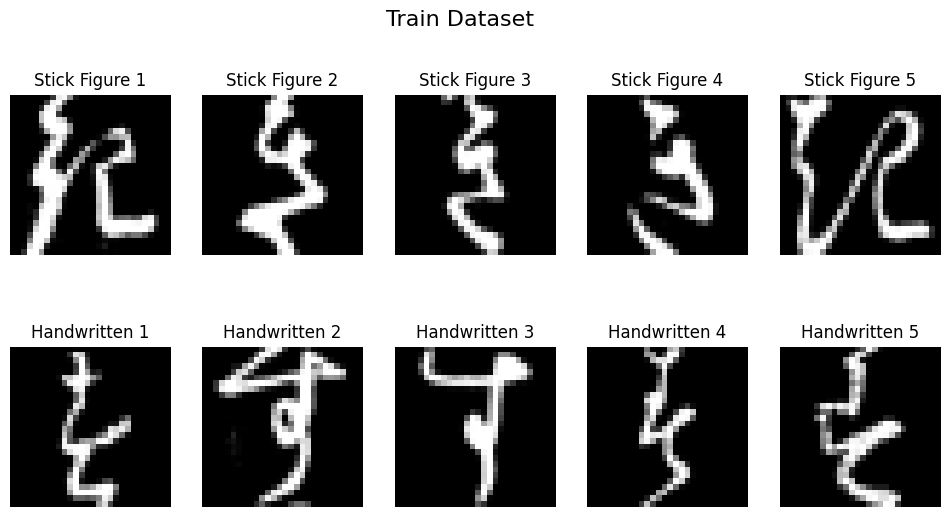

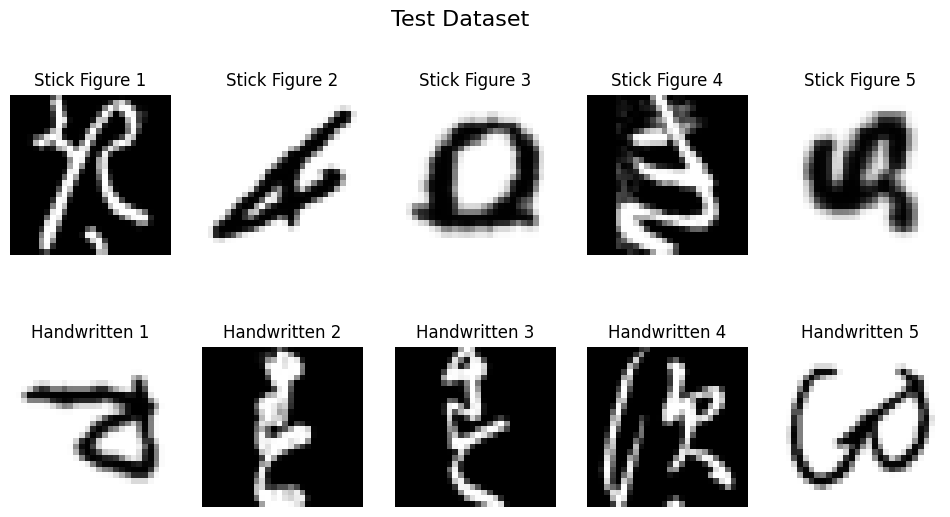

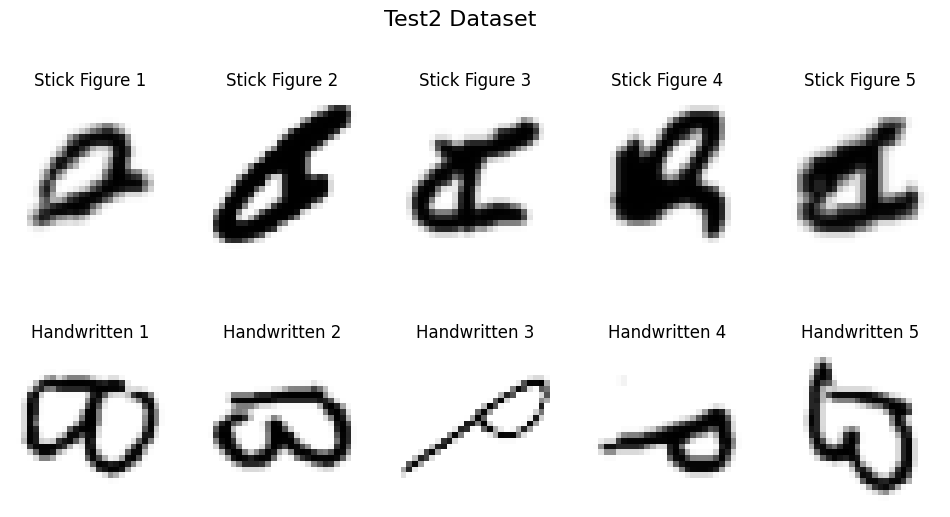

In [17]:
import matplotlib.pyplot as plt

# Function to plot 5 images from both Stick Figures and Handwritten Characters
def plot_images(data, labels, title=""):
    # Separate Stick Figures and Handwritten Characters
    stick_figure_data = data[labels == 0]
    handwritten_data = data[labels == 1]

    # Plotting 5 images of each class
    fig, axes = plt.subplots(2, 5, figsize=(12, 6))
    fig.suptitle(title, fontsize=16)

    # Plot 5 Stick Figure images
    for i in range(5):
        axes[0, i].imshow(stick_figure_data[i].reshape(28, 28), cmap='gray')
        axes[0, i].axis('off')
        axes[0, i].set_title(f"Stick Figure {i+1}")

    # Plot 5 Handwritten Character images
    for i in range(5):
        axes[1, i].imshow(handwritten_data[i].reshape(28, 28), cmap='gray')
        axes[1, i].axis('off')
        axes[1, i].set_title(f"Handwritten {i+1}")

    plt.show()

# Visualize 5 images each from Stick Figures and Handwritten Characters for train_data
plot_images(train_data, train_labels_encoded, title="Train Dataset")

# Visualize 5 images each from Stick Figures and Handwritten Characters for test_data
plot_images(test_data, test_labels_encoded, title="Test Dataset")

# Visualize 5 images each from Stick Figures and Handwritten Characters for test2_data
plot_images(test2_data, test2_labels_encoded, title="Test2 Dataset")

TRAIN: 36000 images - Lighter: 10, Dark: 35990
TEST: 6000 images - Lighter: 3000, Dark: 3000
TEST2: 6000 images - Lighter: 6000, Dark: 0


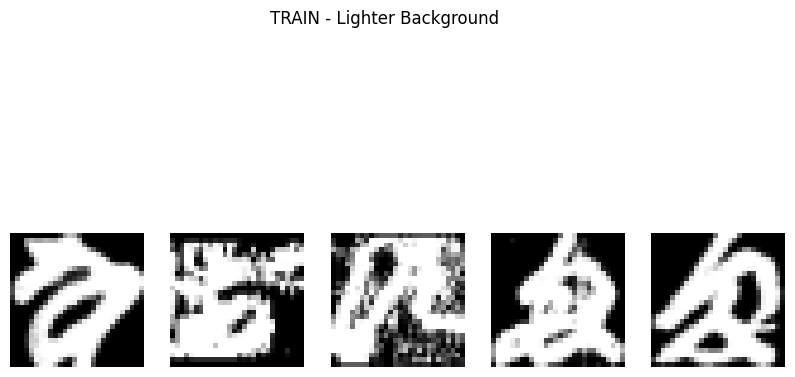

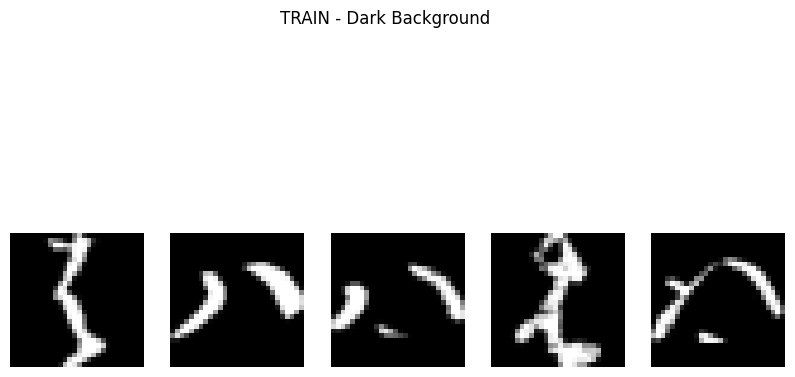

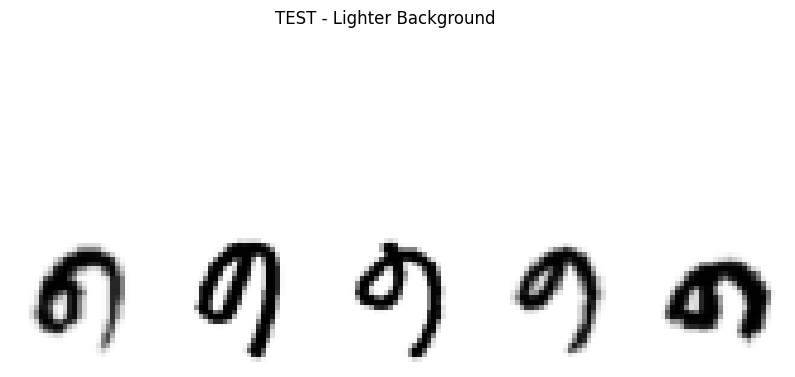

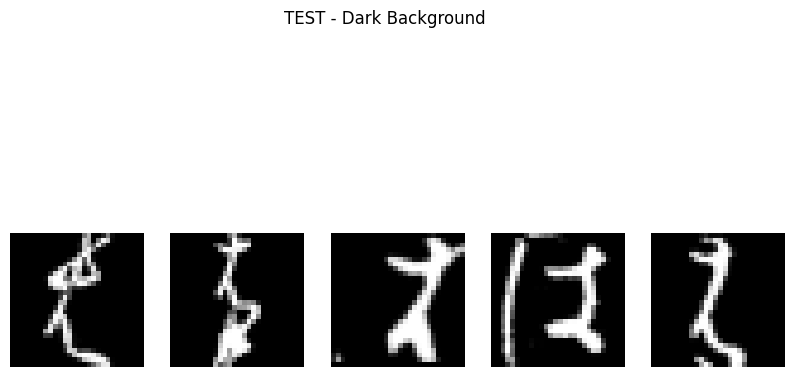

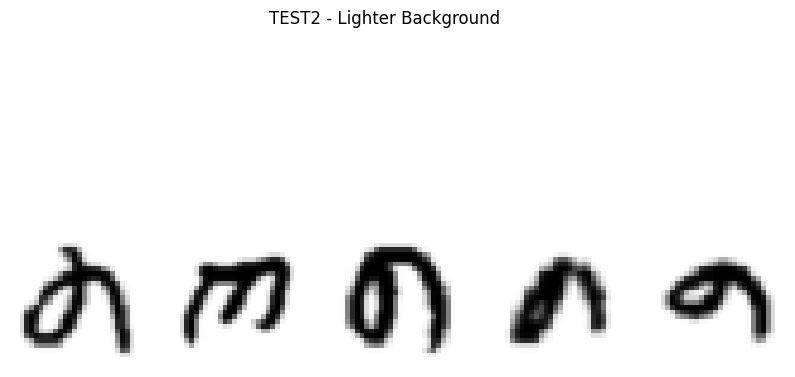

<Figure size 1000x600 with 0 Axes>

In [20]:
import os
import numpy as np
import matplotlib.pyplot as plt

# Function to load data from folder
def load_data_from_folder(folder_path):
    data = []
    labels = []
    for label_folder in os.listdir(folder_path):
        label_path = os.path.join(folder_path, label_folder)
        if os.path.isdir(label_path):
            for file in os.listdir(label_path):
                file_path = os.path.join(label_path, file)
                img = np.load(file_path)
                data.append(img)
                labels.append(label_folder)
    return np.array(data), np.array(labels)

# Function to calculate average pixel intensity (background color)
def calculate_avg_intensity(image):
    return np.mean(image)

# Function to analyze the background based on average intensity
def analyze_background(folder_path):
    data, labels = load_data_from_folder(folder_path)
    lighter_images = []
    dark_images = []

    # Define the threshold for distinguishing light vs dark background
    threshold = 0.5

    # Loop through all images and categorize based on average intensity
    for img in data:
        avg_intensity = calculate_avg_intensity(img[0])
        if avg_intensity > threshold:
            lighter_images.append(img)
        else:
            dark_images.append(img)

    return lighter_images, dark_images, len(data), len(lighter_images), len(dark_images)

# Function to display sample images
def display_sample_images(images, title, num_samples=5):
    plt.figure(figsize=(10, 6))
    for i in range(min(num_samples, len(images))):
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(images[i][0], cmap='gray')
        plt.axis('off')
    plt.suptitle(title)
    plt.show()

# Example folder paths
train_folder_path = '/content/ANN_WS24_Assignment/TRAIN'
test_folder_path = '/content/ANN_WS24_Assignment/TEST'
test2_folder_path = '/content/ANN_WS24_Assignment/TEST2'

# Analyze images in each folder
train_lighter, train_dark, train_total, train_lighter_count, train_dark_count = analyze_background(train_folder_path)
test_lighter, test_dark, test_total, test_lighter_count, test_dark_count = analyze_background(test_folder_path)
test2_lighter, test2_dark, test2_total, test2_lighter_count, test2_dark_count = analyze_background(test2_folder_path)

# Print the total number of images and the count of each background type for each folder
print(f"TRAIN: {train_total} images - Lighter: {train_lighter_count}, Dark: {train_dark_count}")
print(f"TEST: {test_total} images - Lighter: {test_lighter_count}, Dark: {test_dark_count}")
print(f"TEST2: {test2_total} images - Lighter: {test2_lighter_count}, Dark: {test2_dark_count}")

# Display sample images from each folder
display_sample_images(train_lighter, "TRAIN - Lighter Background", num_samples=5)
display_sample_images(train_dark, "TRAIN - Dark Background", num_samples=5)
display_sample_images(test_lighter, "TEST - Lighter Background", num_samples=5)
display_sample_images(test_dark, "TEST - Dark Background", num_samples=5)
display_sample_images(test2_lighter, "TEST2 - Lighter Background", num_samples=5)
display_sample_images(test2_dark, "TEST2 - Dark Background", num_samples=5)